In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from connect4.agent.random_agent import RandomAgent
from connect4.agent.min_max import MinMaxAgentWAlphaBeta
from connect4.agent.monte_carlo import MonteCarlo
from connect4.agent.q_learn import QLearn
from connect4.board import Board, PLAYER1, PLAYER2
from connect4.evaluator import AdvancedScore

from matplotlib import pyplot as plt
from time import time

In [3]:
def plot_train_data(data, rounds, p1, p2, res=200):
    x = [x for x in range(0, rounds, int(rounds/res))]
    win = [x[0] for x in data]
    loose = [x[1] for x in data]
    draw = [x[2] for x in data]
    dist = [x[1]-x[0] for x in data]
    ratio = [((x[0]/(x[0]+x[1]))*100 if x[0] != 0 else 0) for x in data]
       
    fig, ax1 = plt.subplots()
    
    
    ax1.set_ylabel('Count')
    ax1.set_xlabel('Round')  
    
    ax1.plot(x, win, label=p1)
    ax1.plot(x, loose, label=p2)
    ax1.plot(x, draw, label='draw') 
    ax1.legend()
    ax1.grid(axis='x')
    
    ax2 = ax1.twinx() 
    
    ax2.plot(x, ratio, label='ratio', color ='tab:red')
    ax2.set_ylim([0,100])
    ax2.set_ylabel('%', color ='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.legend()
    ax2.grid()
        
    plt.title(f'{p1} vs {p2} {rounds}')
    
       
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [4]:
def play_game(player1, player2, print_end_board):
    board = Board()
    player = PLAYER1

    while not board.is_game_over():
        if player == PLAYER1:
            col = player1.move(board)
            board.add_token(col)
            player = PLAYER2
        elif player == PLAYER2:
            col = player2.move(board)
            board.add_token(col)
            player = PLAYER1
    if print_end_board:
        print(board)
    return board.winner


In [5]:
def play_n_game(n, player1, player2, print_end_board=False, res=200):
    player1.player, player2.player = PLAYER1, PLAYER2
    data = []
    p1, p2, d = 0, 0, 0
    for i in range(n):
        if i % (n / res) == 0:
            data.append((p1, p2, d, time()))
        winner = play_game(player1, player2, print_end_board)
        if winner == 0:
            d += 1
        elif winner == PLAYER1:
            p1 += 1
        elif winner == PLAYER2:
            p2 += 1
    print(f'p1: {p1}, p2: {p2}, d: {d} r:{(p1/(p1+p2))*100}')
    return data

# Random vs Random

p1: 5611, p2: 4362, d: 27 r:56.26190714930311


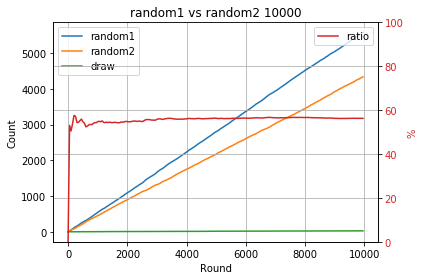

In [6]:
data = play_n_game(10_000, RandomAgent, RandomAgent, print_end_board=False)
plot_train_data(data, 10_000, "random1", 'random2')

p1: 596, p2: 403, d: 1 r:59.65965965965966


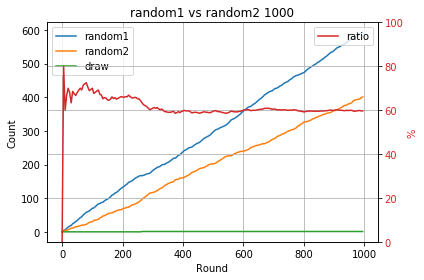

In [7]:
data = play_n_game(1_000, RandomAgent, RandomAgent, print_end_board=False)
plot_train_data(data, 1_000, "random1", 'random2' )

# Qlearn

p1: 828, p2: 172, d: 0 r:82.8


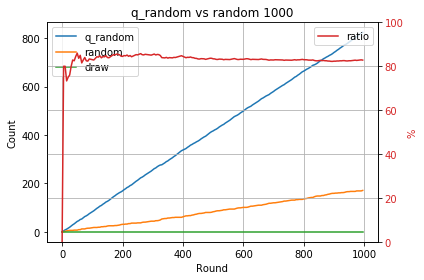

[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  , X,  ,  , X]
[ , O, O, O, O,  , X]

p1: 1, p2: 0, d: 0 r:100.0
p1: 368, p2: 630, d: 2 r:36.87374749498998


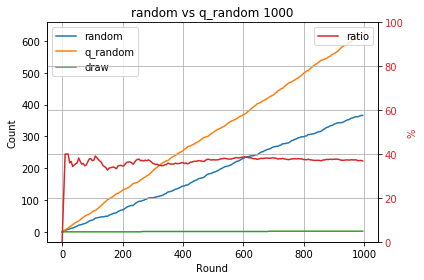

[ ,  ,  , X, X, O,  ]
[ ,  ,  , X, X, O,  ]
[X, X, O, O, O, O,  ]
[O, O, X, O, X, X,  ]
[O, X, X, X, O, O,  ]
[X, O, O, X, O, X, O]

p1: 1, p2: 0, d: 0 r:100.0


[(0, 0, 0, 1576198607.749737)]

In [8]:
q_random = QLearn(source_name='models/RandomAgent_20191212_000513.pkl')

data = play_n_game(1_000, q_random, RandomAgent, print_end_board=False)
plot_train_data(data, 1_000, "q_random", 'random')
play_n_game(1, q_random, RandomAgent, print_end_board=True, res=1)

data = play_n_game(1_000, player2=q_random, player1=RandomAgent, print_end_board=False)
plot_train_data(data, 1_000, p2="q_random", p1='random')
play_n_game(1, player2=q_random, player1=RandomAgent, print_end_board=True, res=1)

p1: 876, p2: 121, d: 3 r:87.86359077231694


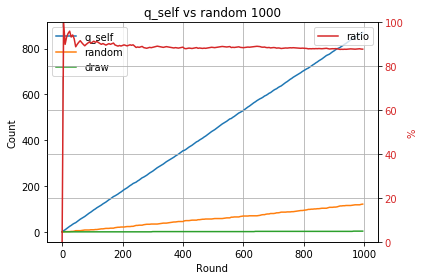

[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ , X,  ,  ,  ,  ,  ]
[ , X,  , O, X,  ,  ]
[O, O, O, O, X, O, X]

p1: 1, p2: 0, d: 0 r:100.0
p1: 464, p2: 532, d: 4 r:46.58634538152611


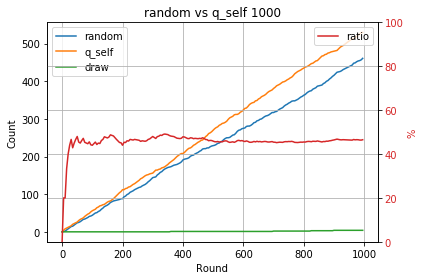

[ ,  ,  ,  ,  ,  , X]
[ ,  ,  ,  ,  ,  , O]
[X, O, O, X,  , X, O]
[O, X, O, X,  , O, X]
[O, X, X, X, X, X, O]
[O, O, X, O, X, O, O]

p1: 0, p2: 1, d: 0 r:0.0


[(0, 0, 0, 1576198611.1914573)]

In [9]:
q_self = QLearn(source_name='models/self_20191212_000724.pkl')

data = play_n_game(1_000, q_self, RandomAgent, print_end_board=False)
plot_train_data(data, 1_000, "q_self", 'random')
play_n_game(1, q_self, RandomAgent, print_end_board=True)

data = play_n_game(1_000, player2=q_self, player1=RandomAgent, print_end_board=False)
plot_train_data(data, 1_000, p2="q_self", p1='random')
play_n_game(1, player2=q_self, player1=RandomAgent, print_end_board=True)

p1: 603, p2: 392, d: 5 r:60.60301507537689


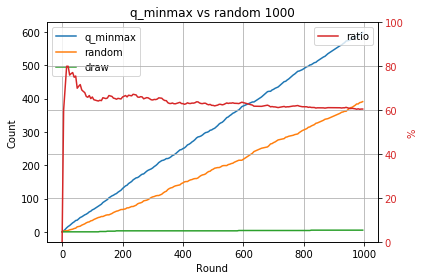

[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  , O,  , X,  ]
[ ,  ,  , O, O, X, X]
[ , X, O, O, O, X, X]
[X, O, O, O, X, O, X]

p1: 1, p2: 0, d: 0 r:100.0
p1: 539, p2: 461, d: 0 r:53.900000000000006


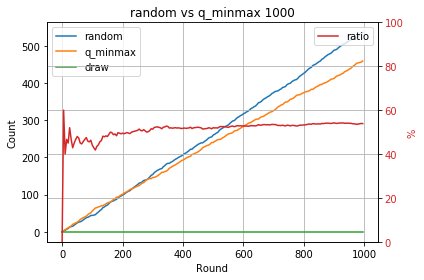

[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ ,  , X, O,  ,  , X]
[X, O, O, O,  ,  , X]
[O, O, O, X,  ,  , O]
[X, O, X, X, X, X, O]

p1: 0, p2: 1, d: 0 r:0.0


[(0, 0, 0, 1576198614.9669936)]

In [10]:
q_minimax = QLearn(source_name='models/MinMax_4deep_20191212_090320.pkl')

data = play_n_game(1_000, q_minimax, RandomAgent, print_end_board=False)
plot_train_data(data, 1_000, "q_minmax", 'random')
play_n_game(1, q_minimax, RandomAgent, print_end_board=True)

data = play_n_game(1_000, player2=q_minimax, player1=RandomAgent, print_end_board=False)
plot_train_data(data, 1_000, p2="q_minmax", p1='random')
play_n_game(1, player2=q_minimax, player1=RandomAgent, print_end_board=True)

p1: 712, p2: 283, d: 5 r:71.55778894472363


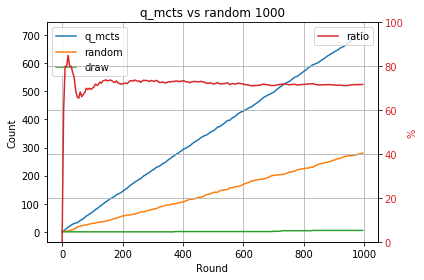

[ ,  ,  ,  ,  , O,  ]
[ ,  , O,  ,  , X, X]
[X,  , O, O, O, X, X]
[X, O, X, X, O, O, O]
[O, X, O, O, X, O, X]
[X, O, X, O, O, X, X]

p1: 1, p2: 0, d: 0 r:100.0
p1: 443, p2: 552, d: 5 r:44.52261306532663


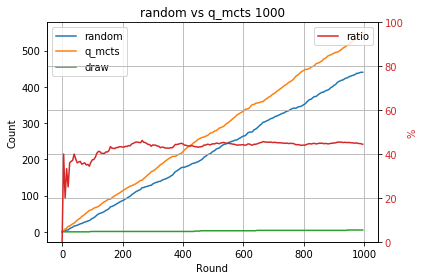

[ ,  ,  , O,  ,  , O]
[ ,  ,  , X,  ,  , O]
[ , O, X, X,  , X, X]
[ , X, O, X,  , X, O]
[ , X, X, O, O, O, X]
[O, X, O, O, O, X, O]

p1: 1, p2: 0, d: 0 r:100.0


[(0, 0, 0, 1576198618.8818088)]

In [11]:
q_mcts = QLearn(source_name='models/MonteCarlo_400_20191212_102119.pkl')

data = play_n_game(1_000, q_mcts, RandomAgent, print_end_board=False)
plot_train_data(data, 1_000, "q_mcts", 'random')
play_n_game(1, q_mcts, RandomAgent, print_end_board=True)

data = play_n_game(1_000, player2=q_mcts, player1=RandomAgent, print_end_board=False)
plot_train_data(data, 1_000, p2="q_mcts", p1='random')
play_n_game(1, player2=q_mcts, player1=RandomAgent, print_end_board=True)

# Against trained

In [12]:
q_minimax = QLearn(source_name='models/MinMax_4deep_20191212_090320.pkl')
adv = AdvancedScore()

play_n_game(1, q_minimax, MinMaxAgentWAlphaBeta(4, adv.score), print_end_board=True,res=1)
play_n_game(1,  MinMaxAgentWAlphaBeta(4, adv.score), q_minimax, print_end_board=True, res=1)

[ ,  ,  ,  ,  ,  ,  ]
[X,  ,  ,  ,  ,  ,  ]
[X,  ,  ,  ,  ,  ,  ]
[X, X,  ,  ,  ,  ,  ]
[O, X, O, O, O, O,  ]
[X, O, X, O, X, O, O]

p1: 1, p2: 0, d: 0 r:100.0
[ , O,  , O,  ,  ,  ]
[ , O,  , O,  ,  ,  ]
[ , O,  , X,  ,  ,  ]
[ , X,  , O,  ,  ,  ]
[O, O,  , X, X, X, X]
[O, X,  , O, X, X, X]

p1: 0, p2: 1, d: 0 r:0.0


[(0, 0, 0, 1576198619.516915)]

In [13]:
q_mcts = QLearn(source_name='models/MonteCarlo_400_20191212_102119.pkl')

play_n_game(2, q_mcts, MonteCarlo(400), print_end_board=True,res=1)
play_n_game(2,  MonteCarlo(400), q_mcts, print_end_board=True, res=1)

[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  , X,  ,  ,  ]
[ , O,  , O,  ,  , X]
[ , X,  , O, O,  , X]
[O, O,  , X, O, O, X]
[X, X,  , O, X, O, X]

[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ , X, X, X, X,  ,  ]
[ , X, O, O, O,  ,  ]
[O, O, X, O, X,  , O]

p1: 0, p2: 2, d: 0 r:0.0
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  , O,  ,  ,  ]
[ , X,  , O,  ,  , X]
[ , O,  , X,  , O, X]
[ , X, X, O, O, O, O]
[X, X, X, O, O, X, O]

[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  , O,  ,  ]
[ ,  ,  ,  , O,  , X]
[ , O,  , O, O,  , X]
[X, O,  , X, O, X, X]

p1: 2, p2: 0, d: 0 r:100.0


[(0, 0, 0, 1576198621.9583397)]

# Random vs MCTS & Minimax

In [14]:
play_n_game(10, MonteCarlo(400), RandomAgent, print_end_board=False,res=1)
play_n_game(10, RandomAgent, MonteCarlo(400), print_end_board=False,res=1)

play_n_game(1, MonteCarlo(400), RandomAgent, print_end_board=True,res=1)

p1: 10, p2: 0, d: 0 r:100.0
p1: 0, p2: 10, d: 0 r:0.0
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  , X,  ]
[X, X, O, O, O, O,  ]

p1: 1, p2: 0, d: 0 r:100.0


[(0, 0, 0, 1576198633.5514388)]

In [15]:
adv = AdvancedScore()

play_n_game(10, MinMaxAgentWAlphaBeta(4, adv.score), RandomAgent, print_end_board=False,res=1)
play_n_game(10, RandomAgent, MinMaxAgentWAlphaBeta(4, adv.score), print_end_board=False,res=1)

play_n_game(1, MinMaxAgentWAlphaBeta(4, adv.score), RandomAgent, print_end_board=True,res=1)

p1: 10, p2: 0, d: 0 r:100.0
p1: 0, p2: 10, d: 0 r:0.0
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ ,  ,  ,  ,  ,  ,  ]
[ , O,  , O,  , X, X]
[X, X, O, O, O, O, X]

p1: 1, p2: 0, d: 0 r:100.0


[(0, 0, 0, 1576198641.6371837)]

# Minimax vs MCTS

p1: 9, p2: 10, d: 1 r:47.368421052631575


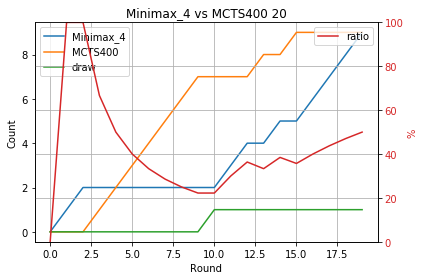

p1: 14, p2: 4, d: 2 r:77.77777777777779


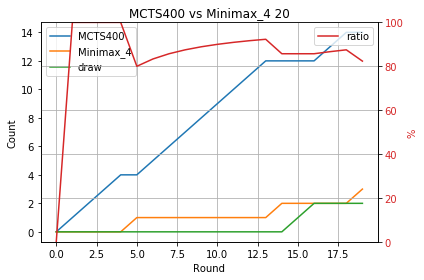

In [16]:
adv = AdvancedScore()

data = play_n_game(20, MinMaxAgentWAlphaBeta(4, adv.score), MonteCarlo(400), print_end_board=False,res=20)
plot_train_data(data, 20, "Minimax_4", 'MCTS400', res=20)
data = play_n_game(20, MonteCarlo(400), MinMaxAgentWAlphaBeta(4, adv.score), print_end_board=False,res=20)
plot_train_data(data, 20, "MCTS400", 'Minimax_4', res=20)

p1: 11, p2: 8, d: 1 r:57.89473684210527


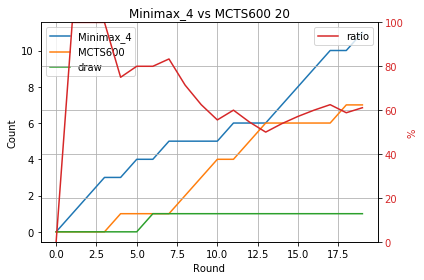

p1: 17, p2: 1, d: 2 r:94.44444444444444


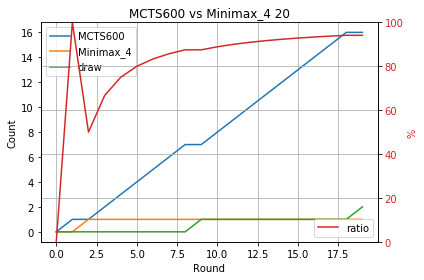

In [17]:
data = play_n_game(20, MinMaxAgentWAlphaBeta(4, adv.score), MonteCarlo(600), print_end_board=False,res=20)
plot_train_data(data, 20, "Minimax_4", 'MCTS600',  res=20)
data = play_n_game(20, MonteCarlo(600), MinMaxAgentWAlphaBeta(4, adv.score), print_end_board=False,res=20)
plot_train_data(data, 20, "MCTS600", 'Minimax_4',  res=20)

p1: 5, p2: 14, d: 1 r:26.31578947368421


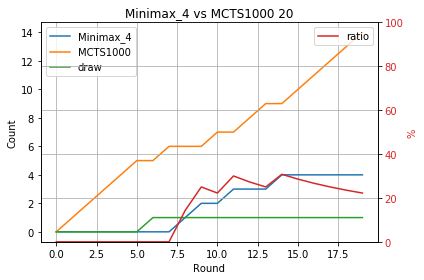

p1: 12, p2: 6, d: 2 r:66.66666666666666


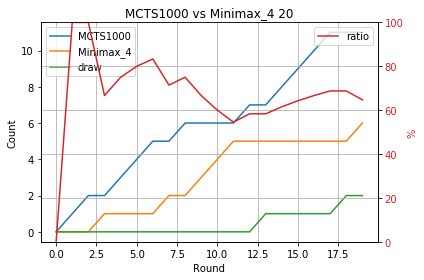

In [18]:
data = play_n_game(20, MinMaxAgentWAlphaBeta(4, adv.score), MonteCarlo(1000), print_end_board=False,res=20)
plot_train_data(data, 20, "Minimax_4", 'MCTS1000',  res=20)
data = play_n_game(20, MonteCarlo(1000), MinMaxAgentWAlphaBeta(4, adv.score), print_end_board=False,res=20)
plot_train_data(data, 20, "MCTS1000", 'Minimax_4',  res=20)

p1: 11, p2: 7, d: 2 r:61.111111111111114


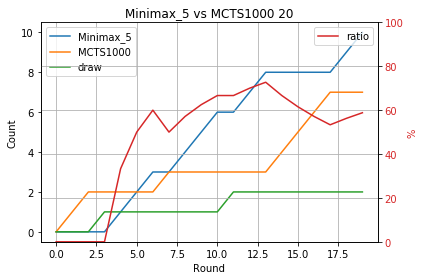

p1: 14, p2: 4, d: 2 r:77.77777777777779


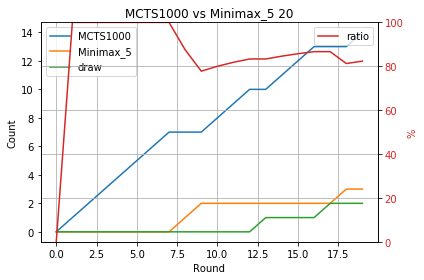

In [19]:
data = play_n_game(20, MinMaxAgentWAlphaBeta(5, adv.score), MonteCarlo(1000), print_end_board=False,res=20)
plot_train_data(data, 20, "Minimax_5", 'MCTS1000',  res=20)
data = play_n_game(20, MonteCarlo(1000), MinMaxAgentWAlphaBeta(5, adv.score), print_end_board=False,res=20)
plot_train_data(data, 20, "MCTS1000", 'Minimax_5',  res=20)

p1: 5, p2: 5, d: 0 r:50.0


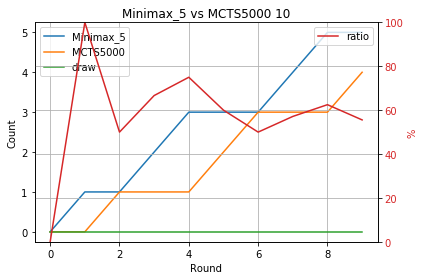

p1: 9, p2: 0, d: 1 r:100.0


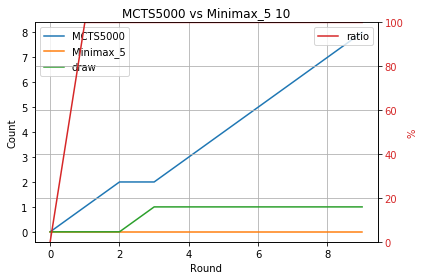

In [20]:
data = play_n_game(10, MinMaxAgentWAlphaBeta(5, adv.score), MonteCarlo(5000), print_end_board=False,res=10)
plot_train_data(data, 10, "Minimax_5", 'MCTS5000',  res=10)
data = play_n_game(10, MonteCarlo(5000), MinMaxAgentWAlphaBeta(5, adv.score), print_end_board=False,res=10)
plot_train_data(data, 10, "MCTS5000", 'Minimax_5',  res=10)

p1: 1, p2: 9, d: 0 r:10.0


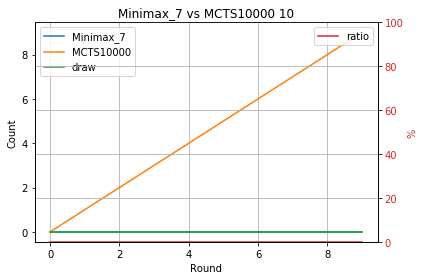

p1: 6, p2: 4, d: 0 r:60.0


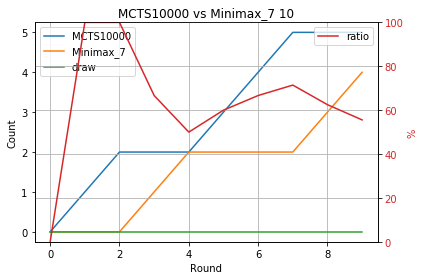

In [22]:
data = play_n_game(10, MinMaxAgentWAlphaBeta(7, adv.score), MonteCarlo(10_000), print_end_board=False,res=10)
plot_train_data(data, 10, "Minimax_7", 'MCTS10000',  res=10)
data = play_n_game(10, MonteCarlo(10_000), MinMaxAgentWAlphaBeta(7, adv.score), print_end_board=False,res=10)
plot_train_data(data, 10, "MCTS10000", 'Minimax_7',  res=10)